<div class="markdown-google-sans">

## **The number of sexual partners and personality**
</div>

Although personality has been tested as a predictor of sexual behaviors, little is known about the contribution of personality to the number of sexual partners. This [study](hhttps://data.mendeley.com/datasets/wgr6fhz4zx/1) aimed to examine the models of association between personality traits and the number of sexual partners in various groups of sexual orientation.

<div class="markdown-google-sans">

## **Packages**
</div>

We import the needed packages with the following code

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<div class="markdown-google-sans">

##**Data import**
</div>

We import our dataset. This time the dataset is an excel sheet with several "sub sheets". We only need the subsheet "**STATISTICAL DATA**"

In [3]:
df = pd.read_excel('https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/d3d00874-a0b8-473b-b3e9-188fea466716', sheet_name="STATISTICAL DATA")

In [4]:
df.head()

,No,IPIP_01,IPIP_02,IPIP_03,IPIP_04,IPIP_05,IPIP_06,IPIP_07,IPIP_08,IPIP_09,...,Sex,Age,Sexual Orientation,Coming Out,Sexual 1itiation,No of Sexual Partners,Unnamed: 46,Unnamed: 47,Variable,Coding
0,1,2,4,2,3,4,2,4,2,1,...,0,23,0,0,1,1,NaN,NaN,Sex,"Women = 0, Men = 1"
1,2,3,2,1,4,4,3,4,4,4,...,0,23,0,0,1,1,NaN,NaN,Age,Number of years old
2,3,5,3,1,2,4,5,3,3,1,...,1,24,0,0,1,1,NaN,NaN,Sexual Orientation,"Heterosexual = 0, Bisexual = 1, Homosexual = 2"
3,4,5,5,2,3,5,5,5,3,2,...,0,25,0,0,1,8,NaN,NaN,Coming Out,"Hide sexual orientation = 1, Do not hide = 0"
4,5,2,4,4,2,2,3,5,3,2,...,0,23,0,0,1,1,NaN,NaN,Sexual Iitiation,"After initiation = 1, Before initiation = 0"


<div class="markdown-google-sans">

##**Dataframe cleanup**
</div>

As this is a large and complex dataset, it would be more efficient to focus on the overall scores of each personality trait, rather than every individual item. To do this, we can create a new dataframe that includes only the necessary variables we need for our calculations.

In [5]:
df1 = df[['Sex','Age', 'Sexual Orientation', 'Coming Out', 'Sexual 1itiation', 
          'No of Sexual Partners', 'Sum_SS', 'Extraversion', 'Agreeableness', 
          'Conscientiousness', 'Emotional Stability', 'Intelligence']]

df1.rename(columns={'Coming Out': 'ComingOut', 'Intelligence': 'Openness'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Let's important to check for extreme values, as they can have a significant impact on the results. By visually inspecting the raw excel sheet, we may have noticed that there are some very high values for the variable "Sexual Orientation" which do not make sense.

In [6]:
max_sex_partner = df1['No of Sexual Partners'].max()
print(max_sex_partner)
print("It appears that the authors of the dataset have already cleaned it for extreme values or outliers.")

72
It appears that the authors of the dataset have already cleaned it for extreme values or outliers.


<div class="markdown-google-sans">

##**Some descriptive statistics**
</div>

Let's have a quick look at some basic descriptive statistics. To get a feeling for our dataset. 

Heterosexual = 0, Bisexual = 1, Homosexual = 2

Non-hetereo people have on average more sexual partners.

In [7]:
df.groupby(['Sexual Orientation'])['No of Sexual Partners'].describe()

,count,mean,std,min,25%,50%,75%,max
Sexual Orientation,,,,,,,,
0,470.0,1.993617,2.812165,0.0,1.0,1.0,2.00,28.0
1,170.0,4.529412,8.559003,0.0,1.0,2.0,4.75,72.0
2,128.0,4.484375,8.319396,0.0,1.0,2.0,5.00,60.0


Let's see if there is a gender difference

Women = 0, Men = 1

We find no difference

In [8]:
df1.groupby('Sex')['No of Sexual Partners'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
0,468.0,2.944444,4.818895,0.0,1.0,1.0,3.0,50.0
1,300.0,3.010000,7.127358,0.0,0.0,1.0,3.0,72.0


In [9]:
male = df.query('Sex == 1')['No of Sexual Partners']
female = df.query('Sex == 0')['No of Sexual Partners']

stats.ttest_ind(male, female, equal_var=True)

Ttest_indResult(statistic=0.15204086717958262, pvalue=0.8791947384377796)

Maybe people who don't hide their sexual orientation live more freely?

Hide sexual orientation = 1, Do not hide = 0

In [10]:
df.groupby(['Coming Out'])['No of Sexual Partners'].describe()

,count,mean,std,min,25%,50%,75%,max
Coming Out,,,,,,,,
0,647.0,2.724884,4.391279,0.0,1.0,1.0,3.0,50.0
1,121.0,4.280992,10.539784,0.0,0.0,2.0,3.0,72.0


In [11]:
hide = df1.query('ComingOut == 1')['No of Sexual Partners']
nhide = df1.query('ComingOut == 0')['No of Sexual Partners']

stats.ttest_ind(hide, nhide, equal_var=True)

Ttest_indResult(statistic=2.707782792648973, pvalue=0.006924455534718604)

<div class="markdown-google-sans">

##**Scatter Plot**
</div>


A scatter plot is a graphical representation of data points in which each point represents the values of two variables. The position of the point on the plot corresponds to the values of the two variables on the x- and y-axes. Scatter plots are commonly used to visualize the relationship between two variables, such as height and weight or age and income.

Correlation lines, also known as regression lines, are often added to scatter plots to show the relationship between the two variables more clearly. A correlation line is a straight line that is drawn through the data points on the scatter plot. The line is fitted to the data using a statistical method called regression analysis, which finds the line that best fits the data.

The slope of the correlation line indicates the strength and direction of the relationship between the two variables. If the slope is positive, it means that the two variables are positively correlated, meaning that as one variable increases, the other also tends to increase. If the slope is negative, it means that the two variables are negatively correlated, meaning that as one variable increases, the other tends to decrease.

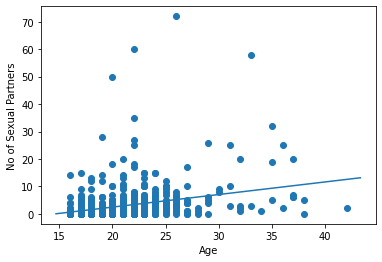

<AxesSubplot:xlabel='Age', ylabel='No of Sexual Partners'>

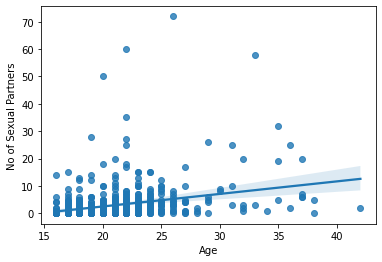

In [28]:
#Method 1
var1 = df1['Age']
var2 =  df1['No of Sexual Partners']

plt.scatter(var1, var2)
plt.ylabel("No of Sexual Partners")
plt.xlabel("Age")

#create the correlation line
axes = plt.gca()
m, b = np.polyfit(var1, var2, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')

plt.show()

#Method 2
sns.regplot(var1, var2)

<div class="markdown-google-sans">

##**Correlation Matrix**
</div>

Let's create a correlation matrix and try to identify interesting correlations in our dataset.

The correlation coefficient, which is a numerical measure of the strength of the relationship between the two variables, is often displayed along with the correlation line. Correlation coefficients range from -1 to 1, with values close to -1 indicating a strong negative correlation, values close to 1 indicating a strong positive correlation, and values close to 0 indicating little or no correlation.

To interpret the correlation we have to know what strong and weak correlations are. Take a look at the following table:

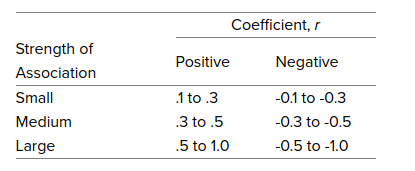

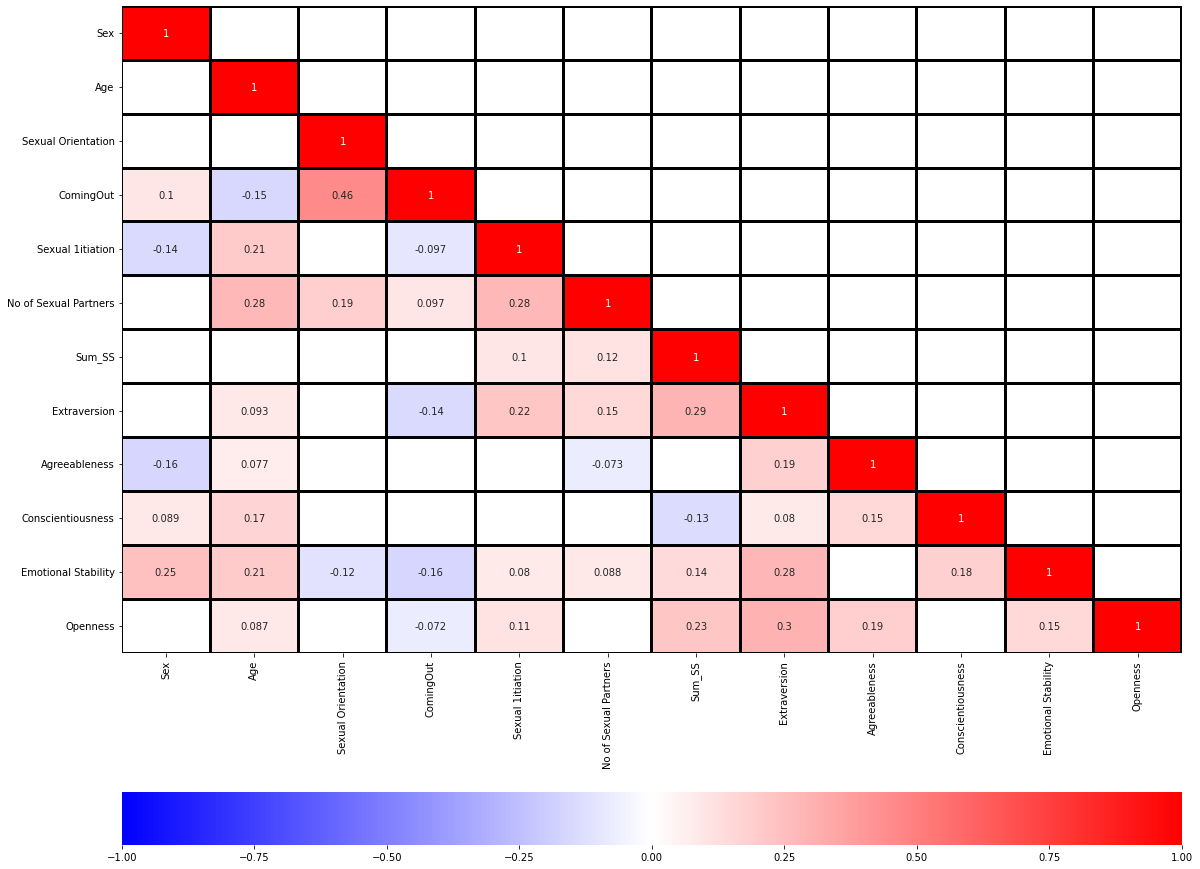

In [ ]:
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(19, 17))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='bwr', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})


corr = df1.corr()
p_values = corr_sig(df1) 
mask = np.triu(corr)
mask = np.invert(np.tril(p_values<0.05))
plot_cor_matrix(corr,mask)
plt.show()

<div class="markdown-google-sans">

## **Task 1**

**What big five personality trait correlates the highest with the number of sexual partners? Why could that be?**
</div>


Spolier: Solution
<details>
  <summary>View Solution</summary>
    Some studies have found that extraversion and openness were positively related to number of sexual partners. However, it's important to note that correlation does not imply causation and there are many factors that could influence the number of sexual partners a person has, such as cultural, societal and individual factors.

</details>

<div class="markdown-google-sans">

## **Task 2**

**Can you spot the spurious correlation?**
</div>


Spolier: Solution
<details>
  <summary>View Solution</summary>
    One spurious correlation could be between Age and No Sexual Partners. <br><br>
    A spurious correlation refers to a relationship between two variables that appear to be correlated but are not actually related. However, it's important to keep in mind that correlation does not imply causation and one should be careful when making conclusions about the relationship between two variables. It's necessary to evaluate other factors that could be affecting the correlation, such as confounding variables or measurement errors.

</details>